In [1]:
import numpy as np
import cv2

In [2]:
xPlane = cv2.imread('imPlane.png',0)
xPlane = (2*np.sign(-1*xPlane)+np.ones([18,16])).astype(int)

yPlane = cv2.imread('plane.png',0)
yPlane = (2*np.sign(-1*yPlane)+np.ones([8,35])).astype(int)

xTank = cv2.imread('imTank.png',0)
xTank = (2*np.sign(-1*xTank)+np.ones([18,16])).astype(int)

yTank = cv2.imread('tank.png',0)
yTank = (2*np.sign(-1*yTank)+np.ones([8,35])).astype(int)

In [3]:
xPlane = xPlane.reshape(18*16)
yPlane = yPlane.reshape(8*35)
xTank = xTank.reshape(18*16)
yTank = yTank.reshape(8*35)

In [4]:
W = np.outer(xPlane,yPlane) + np.outer(xTank,yTank)

In [5]:
def BAM(x,y):
    flag = True
    while flag :
        y_pre = np.copy(y)
        x_pre = np.copy(x)
        for j in range(len(y)):
            y_in_j = 0
            for i in range(len(x)):
                y_in_j = y_in_j + x[i]*W[i][j]

            if y_in_j > 0:
                y[j] = 1
            elif y_in_j < 0:
                y[j] = -1
                
        for i in range(len(x)):
            x_in_i = 0
            for j in range(len(y)):
                x_in_i = x_in_i + y[j]*W[i][j]
            if x_in_i > 0:
                x[i] = 1
            elif x_in_i < 0:
                x[i] = -1
        if((x == x_pre).all and (y ==  y_pre).all):
            flag = False
    return x,y 

In [6]:
x,y =BAM(np.copy(xPlane),np.copy(yPlane))

comparison = x == xPlane
comparison2 = y == yPlane
comparison.all() and comparison2.all()

True

Populating the interactive namespace from numpy and matplotlib
main input pattern output from BAM network :


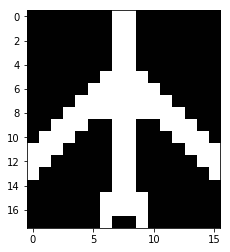

main output pattern output from BAM network :


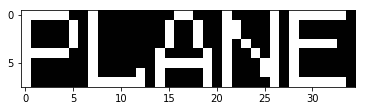

In [22]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
print('main input pattern output from BAM network :')
img1 = Image.fromarray(np.uint8(x.reshape(18,16)*255),'L')
plt.figure()
plt.imshow(img1)
plt.show()
print('main output pattern output from BAM network :')
img2 = Image.fromarray(np.uint8(y.reshape(8,35)*255),'L')
plt.figure()
plt.imshow(img2)
plt.show()

In [23]:
x,y =BAM(np.copy(xTank),np.copy(yTank))

comparison = x == xTank
comparison2 = y == yTank
comparison.all() and comparison2.all()

True

main input pattern output from BAM network :


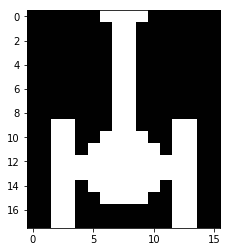

main output pattern output from BAM network :


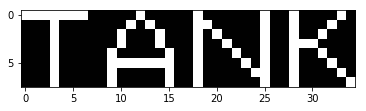

In [24]:
print('main input pattern output from BAM network :')
img1 = Image.fromarray(np.uint8(x.reshape(18,16)*255),'L')
plt.figure()
plt.imshow(img1)
plt.show()
print('main output pattern output from BAM network :')
img2 = Image.fromarray(np.uint8(y.reshape(8,35)*255),'L')
plt.figure()
plt.imshow(img2)
plt.show()

In [25]:
import random
def createDisturb(inp,loss):
    x = np.copy(inp)
    index = random.sample(range(len(x)), int(loss*len(x)))
    for i in index:
        x[i] = x[i]*-1
    return x

In [26]:
distXPlane = createDisturb(xPlane,0.3)
distYPlane = createDisturb(yPlane,0.3)
distXTank = createDisturb(xTank,0.3)
distYTank = createDisturb(yTank,0.3)

disturb pattern of plane input pattern :


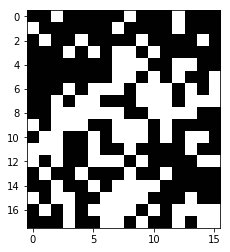

disturb pattern of plane output pattern :


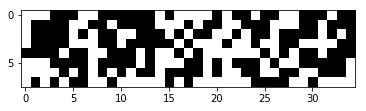

In [28]:
print('disturb pattern of plane input pattern :')
img1 = Image.fromarray(np.uint8(distXPlane.reshape(18,16)*255),'L')
plt.figure()
plt.imshow(img1)
plt.show()
print('disturb pattern of plane output pattern :')
img2 = Image.fromarray(np.uint8(distYPlane.reshape(8,35)*255),'L')
plt.figure()
plt.imshow(img2)
plt.show()

In [29]:
x,y =BAM(np.copy(distXPlane),np.copy(distYPlane))

comparison = x == xPlane
comparison2 = y == yPlane
comparison.all() and comparison2.all()

True

x , output from BAM network :


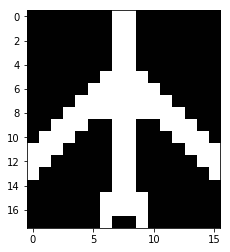

y , output from BAM network :


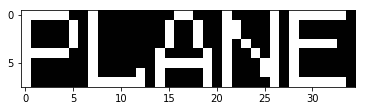

In [31]:
print('x , output from BAM network :')
img1 = Image.fromarray(np.uint8(x.reshape(18,16)*255),'L')
plt.figure()
plt.imshow(img1)
plt.show()
print('y , output from BAM network :')
img2 = Image.fromarray(np.uint8(y.reshape(8,35)*255),'L')
plt.figure()
plt.imshow(img2)
plt.show()

disturb pattern of tank input pattern :


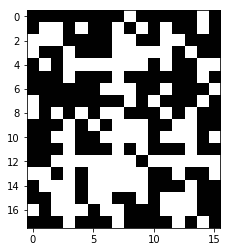

disturb pattern of tank output pattern :


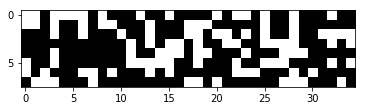

In [33]:
print('disturb pattern of tank input pattern :')
img1 = Image.fromarray(np.uint8(distXTank.reshape(18,16)*255),'L')
plt.figure()
plt.imshow(img1)
plt.show()
print('disturb pattern of tank output pattern :')
img2 = Image.fromarray(np.uint8(distYTank.reshape(8,35)*255),'L')
plt.figure()
plt.imshow(img2)
plt.show()

In [34]:
x,y =BAM(np.copy(distXTank),np.copy(distYTank))

comparison = x == xTank
comparison2 = y == yTank
comparison.all() and comparison2.all()

True

x , output from BAM network :


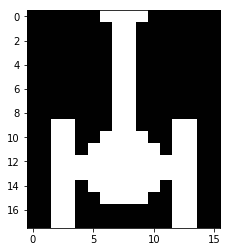

y , output from BAM network :


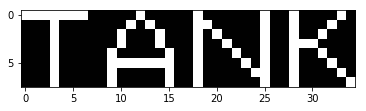

In [35]:
print('x , output from BAM network :')
img1 = Image.fromarray(np.uint8(x.reshape(18,16)*255),'L')
plt.figure()
plt.imshow(img1)
plt.show()
print('y , output from BAM network :')
img2 = Image.fromarray(np.uint8(y.reshape(8,35)*255),'L')
plt.figure()
plt.imshow(img2)
plt.show()

In [43]:
def noise(n,loss):
    trueans = 0
    for ep in range(n):
        char = random.randint(0,1)
        if(char == 0):
            distXPlane = createDisturb(xPlane,loss)
            distYPlane = createDisturb(yPlane,loss)
            
            x,y =BAM(np.copy(distXPlane),np.copy(distYPlane))

            comparison = x == xPlane
            comparison2 = y == yPlane
            
            if (comparison.all() and comparison2.all()):
                trueans += 1
        if(char == 1):
            distXTank = createDisturb(xTank,loss)
            distYTank = createDisturb(yTank,loss)
            
            x,y =BAM(np.copy(distXTank),np.copy(distYTank))

            comparison = x == xTank
            comparison2 = y == yTank
            
            if (comparison.all() and comparison2.all()):
                trueans += 1
#     print('true answers in ',n,' data with noise',loss,'is ',trueans*100/n)   
    return trueans*100/n

In [47]:
print('accuracy with 10% noise : ',noise(100,0.1))
print('accuracy with 20% noise : ',noise(100,0.2))
print('accuracy with 30% noise : ',noise(100,0.3))
print('accuracy with 40% noise : ',noise(100,0.4))
print('accuracy with 50% noise : ',noise(100,0.5))
print('accuracy with 70% noise : ',noise(100,0.7))

accuracy with 10% noise :  100.0
accuracy with 20% noise :  100.0
accuracy with 30% noise :  100.0
accuracy with 40% noise :  99.0
accuracy with 50% noise :  0.0
accuracy with 70% noise :  0.0


In [38]:
x,y =BAM(np.copy(distXPlane),np.copy(yPlane))

comparison = x == xPlane
comparison2 = y == yPlane
comparison.all() and comparison2.all()

True

y , output from BAM network :


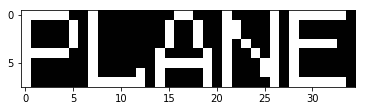

In [39]:
print('y , output from BAM network :')
img2 = Image.fromarray(np.uint8(y.reshape(8,35)*255),'L')
plt.figure()
plt.imshow(img2)
plt.show()

In [40]:
x,y =BAM(np.copy(distXTank),np.copy(yTank))

comparison = x == xTank
comparison2 = y == yTank
comparison.all() and comparison2.all()

True

y , output from BAM network :


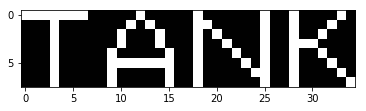

In [41]:
print('y , output from BAM network :')
img2 = Image.fromarray(np.uint8(y.reshape(8,35)*255),'L')
plt.figure()
plt.imshow(img2)
plt.show()